Sample anlysis of Mental Health data

In [6]:
import csv

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('data/mental_data.csv')

# Display the head of the DataFrame
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [3]:
print("helloo word")

helloo word


In [4]:
num_words = len(X_train.str.split().sum())
print("Number of words in X_train:", num_words)

NameError: name 'X_train' is not defined

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the DataFrame
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
         Unnamed: 0
count  53043.000000
mean   26521.000000
std    15312.339501
min        0.000000
25%    13260.500000
50%    26521.000000
75%    39781.500000
max    53042.000000


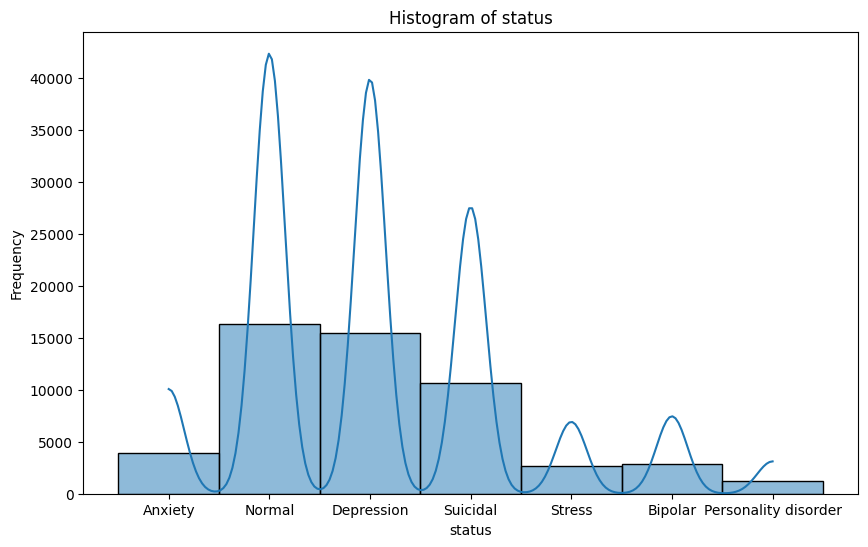

In [10]:
# Plot a histogram of a specific column
plt.figure(figsize=(10, 6))
sns.histplot(df['status'], kde=True)
plt.title('Histogram of status')
plt.xlabel('status')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Preprocess the text data
df['statement'] = df['statement'].str.lower()

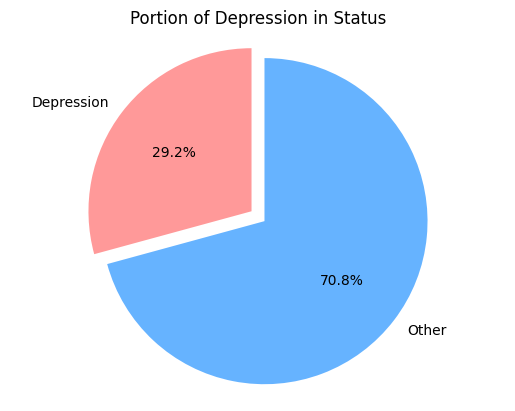

In [23]:
import matplotlib.pyplot as plt

# Data for the pie chart
depression_counts = df['status'].value_counts()['Depression']
total_counts = len(df)

# Calculate the percentage of depression
percentage_depression = (depression_counts / total_counts) * 100

# Calculate the percentage of other statuses
percentage_other = 100 - percentage_depression

# Plotting the pie chart
labels = ['Depression', 'Other']
sizes = [percentage_depression, percentage_other]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the first slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Portion of Depression in Status')
plt.show()

In [5]:
# Calculate the portion of "suicidal" from the "status" column
suicidal_portion = df['status'].value_counts(normalize=True)['suicidal'] * 100

# Print the portion of "suicidal"
print(f"Portion of 'suicidal': {suicidal_portion:.2f}%")

KeyError: 'suicidal'

In [12]:
# Count the number of NaN lines
num_nan_lines = df['statement'].isna().sum()

# Calculate the percentage of NaN lines
percentage_nan_lines = (num_nan_lines / len(df)) * 100

# Remove the NaN lines from the DataFrame
df.dropna(subset=['statement'], inplace=True)

# Print the number and percentage of removed lines
print(f"Number of removed lines: {num_nan_lines}")
print(f"Percentage of removed lines: {percentage_nan_lines:.2f}%")

Number of removed lines: 362
Percentage of removed lines: 0.68%


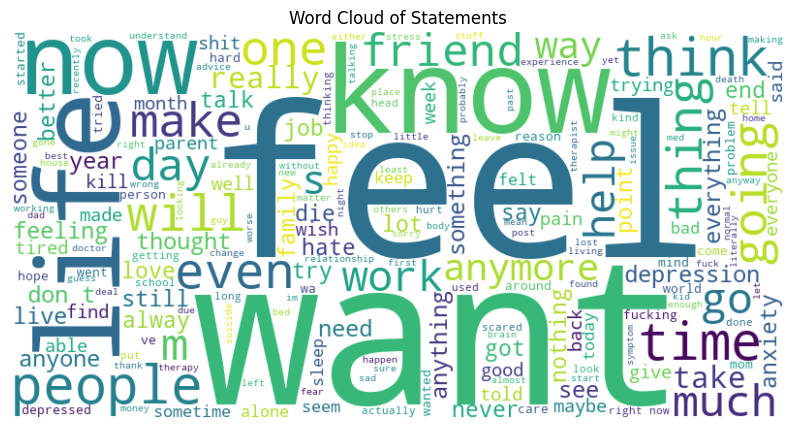

In [13]:
from wordcloud import WordCloud

# Combine all the statements into a single string
all_statements = ' '.join(df['statement'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_statements)

# Display the word cloud chart
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Statements')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['statement'], df['status'], test_size=0.2, random_state=42)

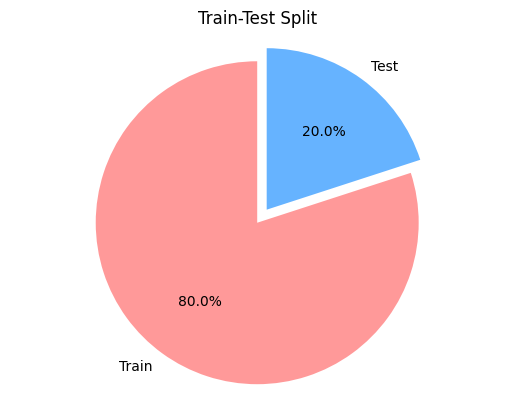

In [15]:
import matplotlib.pyplot as plt

# Data for the pie chart
train_size = len(X_train)
test_size = len(X_test)
total_size = train_size + test_size

# Calculate the percentages
train_percentage = (train_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

# Plotting the pie chart
labels = ['Train', 'Test']
sizes = [train_percentage, test_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the first slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Train-Test Split')
plt.show()

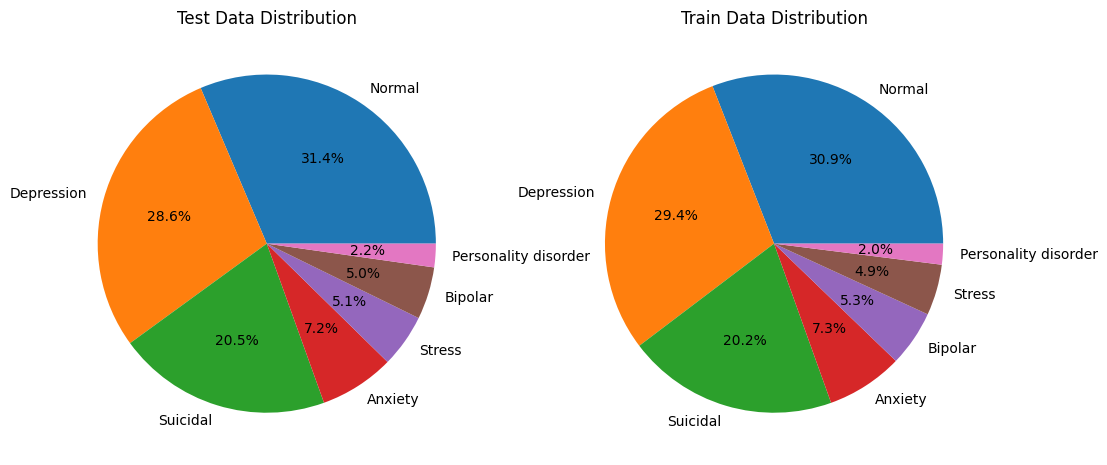

In [16]:
import matplotlib.pyplot as plt

# Data for the pie chart
test_counts = y_test.value_counts()
train_counts = y_train.value_counts()

# Plotting the pie chart
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the test data distribution
axs[0].pie(test_counts, labels=test_counts.index, autopct='%1.1f%%')
axs[0].set_title('Test Data Distribution')

# Plotting the train data distribution
axs[1].pie(train_counts, labels=train_counts.index, autopct='%1.1f%%')
axs[1].set_title('Train Data Distribution')

# Display the pie chart
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Create a Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Print the classification report and confusion matrix
print("Classification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.95      0.07      0.13       755
             Bipolar       0.90      0.02      0.03       527
          Depression       0.36      0.98      0.52      3016
              Normal       0.95      0.53      0.68      3308
Personality disorder       1.00      0.01      0.02       237
              Stress       1.00      0.03      0.06       536
            Suicidal       0.86      0.11      0.20      2158

            accuracy                           0.48     10537
           macro avg       0.86      0.25      0.23     10537
        weighted avg       0.76      0.48      0.42     10537


Confusion Matrix:
[[  52    1  676   26    0    0    0]
 [   0    9  511    7    0    0    0]
 [   0    0 2953   36    0    0   27]
 [   1    0 1526 1769    0    0   12]
 [   0    0  227    8    2    0    0]
 [   2    0  503   14    0   16    1]
 [   0    0 1905    9    0    0  244]]


In [19]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# Create a Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Print the classification report and confusion matrix
print("Classification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.95      0.07      0.13       755
             Bipolar       0.90      0.02      0.03       527
          Depression       0.36      0.98      0.52      3016
              Normal       0.95      0.53      0.68      3308
Personality disorder       1.00      0.01      0.02       237
              Stress       1.00      0.03      0.06       536
            Suicidal       0.86      0.11      0.20      2158

            accuracy                           0.48     10537
           macro avg       0.86      0.25      0.23     10537
        weighted avg       0.76      0.48      0.42     10537


Confusion Matrix:
[[  52    1  676   26    0    0    0]
 [   0    9  511    7    0    0    0]
 [   0    0 2953   36    0    0   27]
 [   1    0 1526 1769    0    0   12]
 [   0    0  227    8    2    0    0]
 [   2    0  503   14    0   16    1]
 [   0    0 1905    9    0    0  244]]


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Generate the classification report
report_rf = classification_report(y_test, y_pred_rf)

# Generate the confusion matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the classification report and confusion matrix
print("Random Forest Classification Report:")
print(report_rf)
print("\nRandom Forest Confusion Matrix:")
print(matrix_rf)

NameError: name 'X_train_tfidf' is not defined

In [20]:
import joblib
from sklearn.pipeline import Pipeline

# Save the model and vectorizer to files
joblib.dump(classifier, 'naive_bayes_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [21]:
import joblib

# Load the model and vectorizer from files
classifier_load = joblib.load('model/rf/naive_bayes_model.joblib')
vectorizer_load = joblib.load('model/rf/tfidf_vectorizer.joblib')

# Sample sentence for prediction
sentence = "i feel so sad"

# Convert the sentence to TF-IDF features
sentence_tfidf = vectorizer_load.transform([sentence])

# Make a prediction
prediction = classifier_load.predict(sentence_tfidf)

# Print the prediction
print("Prediction:", prediction[0])

Prediction: Depression


In [22]:
import torch

# Check if MPS (Metal Performance Shaders) is available
if torch.backends.mps.is_available():
    print("MPS backend is available.")
    if torch.backends.mps.is_built():
        print("MPS backend is built and ready to use.")
else:
    print("MPS backend is not available.")

ModuleNotFoundError: No module named 'torch'

In [ ]:
from sklearn.model_selection import train_test_split

# Split the train data into train and validation sets
X_train_on = X_train
y_train_on = y_train
# Print the size of the small train set
print(f"Size of the small train set: {len(X_train_on)}")

In [ ]:
len(X_train)

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Check if MPS is available and set the device
device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

# Tokenize the input text
max_length = 64  # Reduce max sequence length
train_tokens = tokenizer.batch_encode_plus(X_train_on.tolist(), add_special_tokens=True, padding='max_length', max_length=max_length, truncation=True, return_tensors='pt')
test_tokens = tokenizer.batch_encode_plus(X_test.tolist(), add_special_tokens=True, padding='max_length', max_length=max_length, truncation=True, return_tensors='pt')

# Encode the labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_on)
y_test_encoded = label_encoder.transform(y_test)

# Create TensorDatasets
train_dataset = TensorDataset(train_tokens['input_ids'], train_tokens['attention_mask'], torch.tensor(y_train_encoded))
test_dataset = TensorDataset(test_tokens['input_ids'], test_tokens['attention_mask'], torch.tensor(y_test_encoded))

# Create DataLoaders
batch_size = 8  # Reduce batch size
train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

# Set up the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
total_steps = len(train_loader) * 3  # Number of training epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training function
def train(model, train_loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        model.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
    avg_loss = total_loss / len(train_loader)
    return avg_loss

# Evaluation function
def evaluate(model, dataloader, device):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return predictions, true_labels

# Fine-tune the model
epochs = 3
for epoch in range(epochs):
    avg_train_loss = train(model, train_loader, optimizer, scheduler, device)
    print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss}')

# Get predictions for train and test sets
train_predicted_labels, train_true_labels = evaluate(model, train_loader, device)
test_predicted_labels, test_true_labels = evaluate(model, test_loader, device)

# Generate the classification reports and confusion matrices
train_report = classification_report(train_true_labels, train_predicted_labels, target_names=label_encoder.classes_)
test_report = classification_report(test_true_labels, test_predicted_labels, target_names=label_encoder.classes_)
train_matrix = confusion_matrix(train_true_labels, train_predicted_labels)
test_matrix = confusion_matrix(test_true_labels, test_predicted_labels)

# Print the classification reports and confusion matrices
print("Train Set Classification Report:")
print(train_report)
print("\nTrain Set Confusion Matrix:")
print(train_matrix)
print("\nTest Set Classification Report:")
print(test_report)
print("\nTest Set Confusion Matrix:")
print(test_matrix)